## Importing necessary Libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("music dataSet.csv")

In [3]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Complaints,pop,Somatina,2019,68,{},[Verse 1]\nI don't want to look like a frustra...,5133768,en,en,en
1,12AM,rap,Lil Macks,2021,6443,{},"[Chorus]\nIt's 12am, I found myself in this ri...",7297758,en,en,en
2,Fantastic,rap,LMEN PRALA,2021,2027,{Curtis},"[Refrén]\nMég táncolj, rázzad, ne parázz bae\n...",7073645,hu,hu,hu
3,VIOLENT 3,rap,UG Planet,2021,575,"{Fairy5100,Ayomagg,LuvLilGeo,Raidurr,""Kidd Aki...","[Intro]\n(Goated, this shit is crazy)\n\n[Vers...",7274717,en,en,en
4,Snow White,pop,Zack Martino,2021,41,"{""Kyle Reynolds""}","[Verse 1]\nShe don't need money, she likes to ...",7188507,en,en,en


### checking the top artists in terms of amount of songs

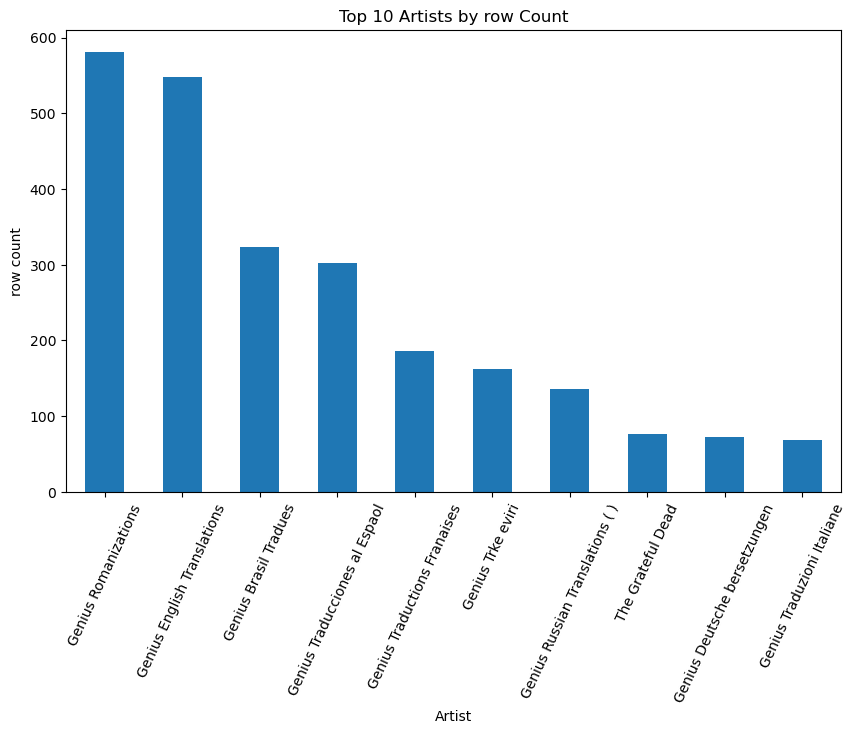

In [4]:
artist_counts = df['artist'].value_counts()
plt.figure(figsize=(10, 6))
artist_counts[:10].plot(kind='bar')
plt.title('Top 10 Artists by row Count')
plt.xlabel('Artist')
plt.ylabel('row count')
plt.xticks(rotation=65)
plt.show()

### scattering the year vs views

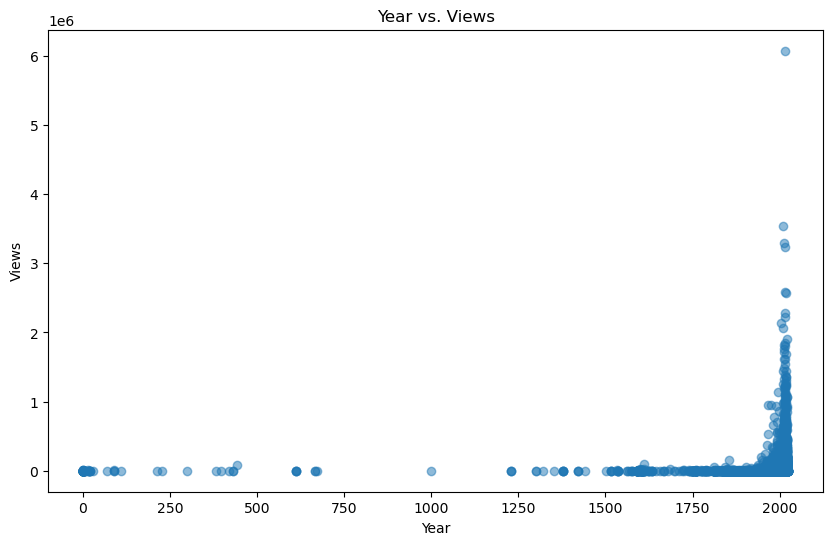

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['views'], alpha=0.5)
plt.title('Year vs. Views')
plt.xlabel('Year')
plt.ylabel('Views')
plt.show()

### getting rid of music before 1600

In [6]:
df = df[df['year'] >= 1600]

In [11]:
language_counts = df['language'].value_counts()

# Set a threshold for displaying slices
threshold = 2  # Display slices for languages with at least 2%

# Calculate percentage for each language
total_count = language_counts.sum()
language_counts = language_counts[language_counts / total_count * 100 >= threshold]

# Create an interactive pie chart using Plotly
fig = px.pie(language_counts, names=language_counts.index, values=language_counts,
             title='Language Distribution',
             labels={'names': 'Language', 'values': 'Percentage'})

# Customize the appearance and layout
fig.update_traces(textinfo='percent+label', pull=[0.1] * len(language_counts))
fig.update_layout(title_x=0.5)

# Show the interactive plot
fig.show()

In [12]:
df['tag'].unique()

array(['pop', 'rap', 'rock', 'rb', 'country', 'misc'], dtype=object)

In [ ]:
encoder=OneHotEncoder(sparse_output=False,categories='auto')

tags_encoded=encoder.fit_transform(df[['tag']])

tags_encoded_df = pd.DataFrame(tags_encoded, columns=encoder.get_feature_names_out(['tag']))

data_encoded = pd.concat([df, tags_encoded_df], axis=1)

data_encoded.drop(columns=['tag'], inplace=True)

In [ ]:
df=data_encoded

df.head()

In [ ]:
df['title'].nunique()

In [ ]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_lg')

In [ ]:
w1="The sun is shining in a clear blue sky."
w2="The mountain peak is covered in a blanket of snow"
w3="the smell of freshly baked bread fills the air."

w4="The concert was a magical experience with vibrant lights and music"
w5="John will drink soda."

w1=nlp(w1)
w2=nlp(w2)
w3=nlp(w3)
w4=nlp(w4)
w5=nlp(w5)

In [ ]:
print(w1.similarity(w2))

print(w1.similarity(w3))

print(w4.similarity(w5))

In [ ]:
s1=df['lyrics'].loc[1]
s2=df['lyrics'].loc[7]

s1=nlp(s1)
s2=nlp(s2)

s1.similarity(s2)

In [ ]:
df=df.dropna(subset=['lyrics','artist','title'])

In [ ]:
sample=df[df['views']<50]

sample.shape 

In [ ]:
df_duplicated=df.duplicated(subset=['title'],keep=False)

duplicated_values=df.loc[df_duplicated]

In [ ]:
cols=['language','language_ft','language_cld3']

dpl=df[df[cols] is None]

print(dpl)

In [ ]:
artist_counts = df['artist'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index[:10], y=artist_counts[:10])
plt.title('Top 10 Artists by Row Count')
plt.xlabel('Artist')
plt.ylabel('Row Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['views'], alpha=0.5)
plt.title('Year vs. Views')
plt.xlabel('Year')
plt.ylabel('Views')
plt.show()

In [ ]:
df = df[df['year'] >= 1600]
plt.scatter(df['year'], df['views'], alpha=0.5)
plt.title('Year vs. Views')
plt.xlabel('Year')
plt.ylabel('Views')
plt.show()